In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('datasets/mtcars.csv')
print('mtcars Data\n',df)

mtcars Data
      mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  carb
0   21.0    6  160.0  110  3.90  2.620  16.46   0   1     4     4
1   21.0    6  160.0  110  3.90  2.875  17.02   0   1     4     4
2   22.8    4  108.0   93  3.85  2.320  18.61   1   1     4     1
3   21.4    6  258.0  110  3.08  3.215  19.44   1   0     3     1
4   18.7    8  360.0  175  3.15  3.440  17.02   0   0     3     2
5   18.1    6  225.0  105  2.76  3.460  20.22   1   0     3     1
6   14.3    8  360.0  245  3.21  3.570  15.84   0   0     3     4
7   24.4    4  146.7   62  3.69  3.190  20.00   1   0     4     2
8   22.8    4  140.8   95  3.92  3.150  22.90   1   0     4     2
9   19.2    6  167.6  123  3.92  3.440  18.30   1   0     4     4
10  17.8    6  167.6  123  3.92  3.440  18.90   1   0     4     4
11  16.4    8  275.8  180  3.07  4.070  17.40   0   0     3     3
12  17.3    8  275.8  180  3.07  3.730  17.60   0   0     3     3
13  15.2    8  275.8  180  3.07  3.780  18.00   0   0     3    

In [8]:
df.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')

In [13]:
# separate the input and output variable
x = df[['disp', 'hp','wt']] #3inputs
y = df['mpg']#output

In [17]:
print('inputs\n',x),print('mpg output\n',y)

inputs
      disp   hp     wt
0   160.0  110  2.620
1   160.0  110  2.875
2   108.0   93  2.320
3   258.0  110  3.215
4   360.0  175  3.440
5   225.0  105  3.460
6   360.0  245  3.570
7   146.7   62  3.190
8   140.8   95  3.150
9   167.6  123  3.440
10  167.6  123  3.440
11  275.8  180  4.070
12  275.8  180  3.730
13  275.8  180  3.780
14  472.0  205  5.250
15  460.0  215  5.424
16  440.0  230  5.345
17   78.7   66  2.200
18   75.7   52  1.615
19   71.1   65  1.835
20  120.1   97  2.465
21  318.0  150  3.520
22  304.0  150  3.435
23  350.0  245  3.840
24  400.0  175  3.845
25   79.0   66  1.935
26  120.3   91  2.140
27   95.1  113  1.513
28  351.0  264  3.170
29  145.0  175  2.770
30  301.0  335  3.570
31  121.0  109  2.780
mpg output
 0     21.0
1     21.0
2     22.8
3     21.4
4     18.7
5     18.1
6     14.3
7     24.4
8     22.8
9     19.2
10    17.8
11    16.4
12    17.3
13    15.2
14    10.4
15    10.4
16    14.7
17    32.4
18    30.4
19    33.9
20    21.5
21    15.5
22    15.2
2

(None, None)

In [15]:
x.corrwith(y)

disp   -0.847551
hp     -0.776168
wt     -0.867659
dtype: float64

In [18]:
# build model
from sklearn.linear_model import LinearRegression

In [19]:
regressor = LinearRegression()
regressor.fit(x,y)

LinearRegression()

In [20]:
regressor.score(x,y)

0.8268361424946447

In [21]:
# m value
regressor.coef_

array([-9.37009081e-04, -3.11565508e-02, -3.80089058e+00])

In [22]:
# c value
regressor.intercept_

37.10550526903182

In [23]:
# predict mpg for an unseen data
disp = 221
hp = 102
wt = 2.91
regressor.predict([[221,102,2.91]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([22.65986648])

In [26]:
result = pd.DataFrame({
    'disp':[221],
    'hp': [102],
    'wt': [2.91]
})
result

,disp,hp,wt
0,221,102,2.91


In [32]:
y_pred = regressor.predict(result)
print('predicted milage is:\n', y_pred)

predicted milage is:
 [22.65986648]


In [35]:
predict = disp*regressor.coef_[0] + hp*regressor.coef_[1] + wt*regressor.coef_[2] + regressor.intercept_
print('predicted milage is:\n', predict)

predicted milage is:
 22.65986648189271


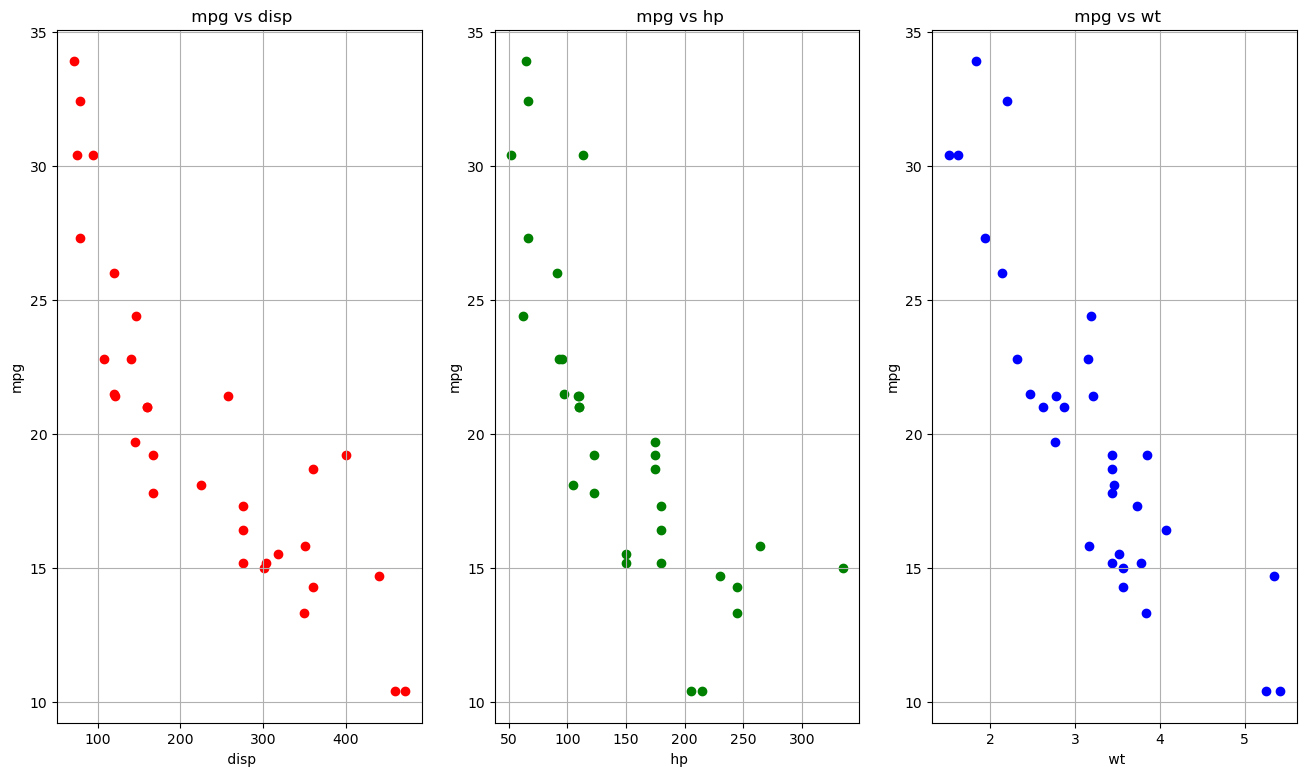

In [45]:
plt.figure(figsize = (16,9))
plt.subplot(1,3,1)
plt.title(' mpg vs disp')
plt.xlabel(' disp')
plt.ylabel('mpg')
plt.grid()
plt.scatter(x['disp'], y, color = 'red')

plt.subplot(1,3,2)
plt.title(' mpg vs hp')
plt.xlabel(' hp')
plt.ylabel('mpg')
plt.grid()
plt.scatter(x['hp'], y, color = 'green')

plt.subplot(1,3,3)
plt.title(' mpg vs wt')
plt.xlabel(' wt')
plt.ylabel('mpg')
plt.grid()
plt.scatter(x['wt'], y, color = 'blue')